In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
user_gameplay = pd.read_csv("Analytics Position Case Study - User Gameplay data.csv",skiprows=3)
deposit_data = pd.read_csv("Copy of Analytics Position Case Study - Deposit Data.csv",skiprows=3)
withdrawal = pd.read_csv("Copy of Analytics Position Case Study - Withdrawal Data.csv",skiprows=3)

In [254]:
user_gameplay.head()


,User ID,Games Played,Datetime
0,851,1,01-10-2022 0:00
1,717,1,01-10-2022 0:00
2,456,1,01-10-2022 0:00
3,424,1,01-10-2022 0:00
4,845,1,01-10-2022 0:00


In [219]:
deposit_data.head()

,User Id,Datetime,Amount
0,357,01-10-2022 0:03,2000
1,776,01-10-2022 0:03,2500
2,492,01-10-2022 0:06,5000
3,803,01-10-2022 0:07,5000
4,875,01-10-2022 0:09,1500


In [220]:
withdrawal.head()

,User Id,Datetime,Amount
0,190,01-10-2022 0:03,5872
1,159,01-10-2022 0:16,9540
2,164,01-10-2022 0:24,815
3,946,01-10-2022 0:29,23000
4,763,01-10-2022 0:40,9473


In [3]:

for df in (user_gameplay, deposit_data, withdrawal):
    df.columns = (
        df.columns
          .str.strip()                   
          .str.replace(r"\s+", "_", regex=True)   
          .str.lower()                    
    )


In [222]:
user_gameplay.head()

,user_id,games_played,datetime
0,851,1,01-10-2022 0:00
1,717,1,01-10-2022 0:00
2,456,1,01-10-2022 0:00
3,424,1,01-10-2022 0:00
4,845,1,01-10-2022 0:00


In [4]:
for df in [user_gameplay,deposit_data,withdrawal]:
    df['datetime'] = pd.to_datetime(df["datetime"],format="%d-%m-%Y %H:%M")
    df['date'] = df['datetime'].dt.date
    df['hour'] = df['datetime'].dt.hour
    df['slot'] = df['hour'] .apply(lambda x:'S1' if x <12 else 'S2')

In [224]:
withdrawal.head()

,user_id,datetime,amount,date,hour,slot
0,190,2022-10-01 00:03:00,5872,2022-10-01,0,S1
1,159,2022-10-01 00:16:00,9540,2022-10-01,0,S1
2,164,2022-10-01 00:24:00,815,2022-10-01,0,S1
3,946,2022-10-01 00:29:00,23000,2022-10-01,0,S1
4,763,2022-10-01 00:40:00,9473,2022-10-01,0,S1


In [5]:
def compute_points(dep_amt, wd_amt, num_deposit, num_withdrawal, game_cnt):
    dep_score = 0.01 * dep_amt
    wd_score = 0.005 * wd_amt
    net_bonus = 0.001 * max(num_deposit - num_withdrawal, 0)
    game_score = 0.2 * game_cnt
    return dep_score + wd_score + net_bonus + game_score



def summarize_user_activity(given_date, timeslot):
    dt = pd.to_datetime(given_date, dayfirst=True).date()

    filtered_deposits = deposit_data[(deposit_data['date'] == dt) & (deposit_data['slot'] == timeslot)]
    filtered_games = user_gameplay[(user_gameplay['date'] == dt) & (user_gameplay['slot'] == timeslot)]
    filtered_withdraws = withdrawal[(withdrawal['date'] == dt) & (withdrawal['slot'] == timeslot)]

    deposits_grouped = filtered_deposits.groupby('user_id')['amount'].sum()
    deposits_count = filtered_deposits.groupby('user_id').size()
    games_grouped = filtered_games.groupby('user_id')['games_played'].sum()
    withdraws_grouped = filtered_withdraws.groupby('user_id')['amount'].sum()
    withdraws_count = filtered_withdraws.groupby('user_id').size()

    all_ids = set(deposits_grouped.index).union(games_grouped.index).union(withdraws_grouped.index)

    summary_list = []
    for uid in all_ids:
        dep_amt = deposits_grouped.get(uid, 0)
        wd_amt = withdraws_grouped.get(uid, 0)
        num_deposit = deposits_count.get(uid, 0)
        num_withdrawal = withdraws_count.get(uid, 0)
        gam = games_grouped.get(uid, 0)
        
        loyalty_val = compute_points(dep_amt, wd_amt, num_deposit, num_withdrawal, gam)
        summary_list.append({'user_id': uid,'total_deposit': dep_amt,'total_games': gam,'total_withdrawal': wd_amt,'num_deposits': num_deposit,'num_withdrawals': num_withdrawal,'loyalty_score': loyalty_val})

    return pd.DataFrame(summary_list)



Part A
Find Playerwise Loyalty points earned by Players in the following slots:-

In [33]:
#a) 2nd October Slot S1

slot1 = summarize_user_activity('02-10-2022', 'S1')
print(slot1.sort_values('loyalty_score', ascending=False))

     user_id  total_deposit  total_games  total_withdrawal  num_deposits  \
395      634              0            0            295671             0   
423      672         100000            0             60000             1   
349      566          35000            1            180041             2   
605      949           5500            0            124500             1   
267      446          55000            1                 0             2   
..       ...            ...          ...               ...           ...   
192      334              0            1                 0             0   
470      752              0            1                 0             0   
200      346              0            1                 0             0   
321      527              0            1                 0             0   
194      336              0            1                 0             0   

     num_withdrawals  loyalty_score  
395                1       1478.355  
423        

In [34]:
#b)16th October Slot S2

slot2 = summarize_user_activity('16-10-2022', 'S2')
print(slot2.sort_values('loyalty_score', ascending=False))


     user_id  total_deposit  total_games  total_withdrawal  num_deposits  \
365      634              0            0            298311             0   
122      212          99999            0                 0             1   
51        99          98000            0                 0             2   
15        28          90000            0                 0             4   
328      566          88000            1                 0             3   
..       ...            ...          ...               ...           ...   
304      526              0            1                 0             0   
307      533              0            1                 0             0   
309      536              0            1                 0             0   
491      841              0            1                 0             0   
593      999              0            1                 0             0   

     num_withdrawals  loyalty_score  
365                1       1491.555  
122        

In [35]:
#c) 18th October Slot S1

slot3 = summarize_user_activity('18-10-2022', 'S1')
print(slot3.sort_values('loyalty_score', ascending=False))



     user_id  total_deposit  total_games  total_withdrawal  num_deposits  \
391      634              0            0            544620             0   
122      208         170000            7                 0             1   
419      673          90000            4                 0             1   
92       162          12000            0            130000             1   
147      245              0            0            150000             0   
..       ...            ...          ...               ...           ...   
269      443              0            1                 0             0   
270      444              0            1                 0             0   
272      446              0            1                 0             0   
511      818              0            1                 0             0   
311      513              0            1                 0             0   

     num_withdrawals  loyalty_score  
391                2       2723.100  
122        

In [36]:
#d) 26th October Slot S2

slot4 = summarize_user_activity('26-10-2022', 'S2')
print(slot4.sort_values('loyalty_score', ascending=False))



     user_id  total_deposit  total_games  total_withdrawal  num_deposits  \
447      714         200000            0                 0             1   
227      369          50000            1            200343             1   
393      634          10000            1            227362             1   
329      538         120000            2                 0             3   
0          2          90000            0                 0             2   
..       ...            ...          ...               ...           ...   
478      766              0            1                 0             0   
479      767              0            1                 0             0   
238      385              0            1                 0             0   
113      185              0            1                 0             0   
627      999              0            1                 0             0   

     num_withdrawals  loyalty_score  
447                0       2000.001  
227        

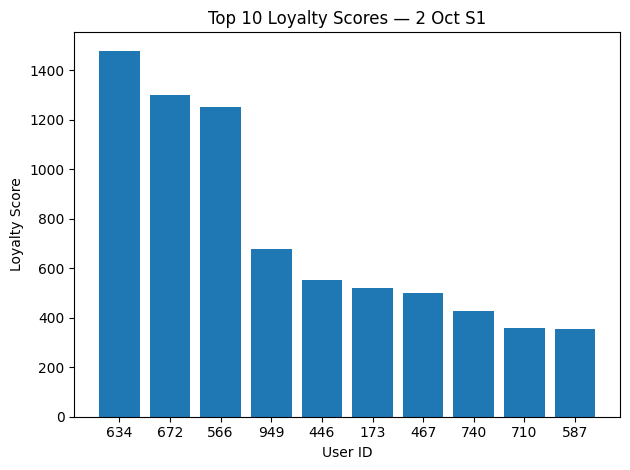

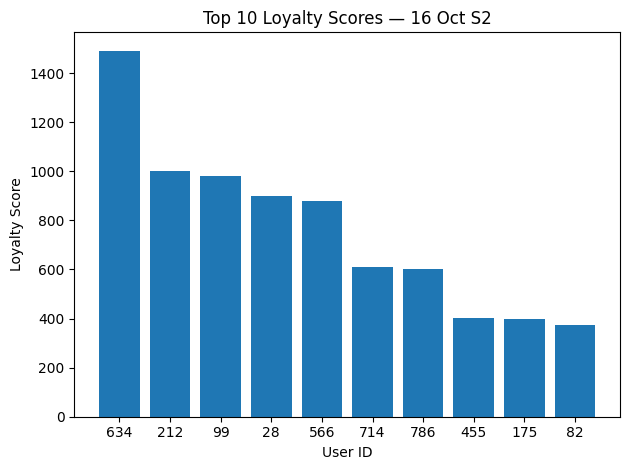

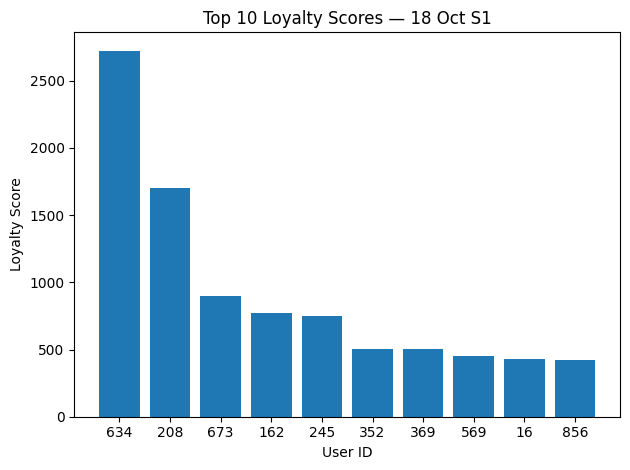

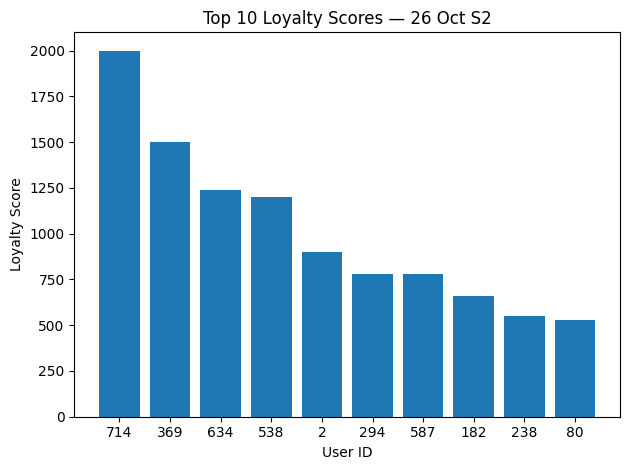

In [28]:
slot_list = [
    (slot1, '2 Oct S1'),
    (slot2, '16 Oct S2'),
    (slot3, '18 Oct S1'),
    (slot4, '26 Oct S2'),
]

for df_slot, label in slot_list:
    topn = df_slot.sort_values('loyalty_score', ascending=False).head(10)

    x = topn['user_id'].astype(str)
    y = topn['loyalty_score']
    
    plt.figure()
    plt.bar(x, y)
    plt.title(f'Top 10 Loyalty Scores — {label}')
    plt.xlabel('User ID')
    plt.ylabel('Loyalty Score')
    plt.tight_layout()
    plt.show()


2. Calculate overall loyalty points earned and rank players on the basis of loyalty points in the month of October. 
     In case of tie, number of games played should be taken as the next criteria for ranking.


In [6]:
# since all the data is just for the month of October, I directly grouped by users

dep_sum = deposit_data.groupby('user_id')['amount'].sum()           
dep_count = deposit_data.groupby('user_id').size()
gam_sum = user_gameplay.groupby('user_id')['games_played'].sum()        
wd_sum = withdrawal.groupby('user_id')['amount'].sum()
wd_count = withdrawal.groupby('user_id').size()


df_oct = pd.DataFrame({'total_deposit': dep_sum,'total_games': gam_sum,'total_withdrawal': wd_sum,'num_deposits': dep_count,'num_withdrawals': wd_count}).fillna(0).reset_index()


df_oct['loyalty_score'] = df_oct.apply(lambda x: compute_points(x.total_deposit,x.total_games,x.total_withdrawal,x.num_deposits,x.num_withdrawals),axis=1)


df_oct = df_oct.sort_values(['loyalty_score', 'total_games'], ascending=[False, False]).reset_index(drop=True)
df_oct['rank'] = range(1, len(df_oct) + 1)

df_oct

,user_id,total_deposit,total_games,total_withdrawal,num_deposits,num_withdrawals,loyalty_score,rank
0,672,2158700.0,10,233750.0,35.0,5.0,21821.765,1
1,634,515000.0,24,15737705.0,8.0,67.0,20901.217,2
2,212,1924981.0,1,589850.0,26.0,4.0,19840.439,3
3,566,1819175.0,183,185071.0,53.0,3.0,18378.283,4
4,740,1738490.0,2,365288.0,91.0,7.0,17751.507,5
...,...,...,...,...,...,...,...,...
995,643,0.0,2,0.0,0.0,0.0,0.010,996
996,857,0.0,2,0.0,0.0,0.0,0.010,997
997,858,0.0,2,0.0,0.0,0.0,0.010,998
998,993,0.0,2,0.0,0.0,0.0,0.010,999


3. What is the average deposit amount?


In [37]:
avg_amount = deposit_data['amount'].mean()
print(f"Average deposit amount: {avg_amount.round(2)}")

Average deposit amount: 5492.19


4. What is the average deposit amount per user in a month?


In [258]:

deposit_data = deposit_data.groupby('user_id')['amount'].mean()
deposit_data

user_id
1       5000.000000
2      28350.000000
3      10000.000000
4       1750.000000
5       1105.970149
           ...     
994     1400.000000
995     6900.000000
996     3109.677419
998     1480.000000
999     3000.000000
Name: amount, Length: 915, dtype: float64

OR

In [259]:
deposit_data = df.copy()
total_per_user = deposit_data.groupby('user_id')['amount'].sum().reset_index(name='totpermonth')
total_per_user['avg_month'] = total_per_user['totpermonth'] / 31
print(total_per_user)

     user_id  totpermonth     avg_month
0          2      1270215  40974.677419
1          5        32700   1054.838710
2          7         6617    213.451613
3          9       171456   5530.838710
4         11       101500   3274.193548
..       ...          ...           ...
509      980        87900   2835.483871
510      985       155000   5000.000000
511      987       135650   4375.806452
512      989      1339000  43193.548387
513      992       616278  19879.935484

[514 rows x 3 columns]


5. What is the average number of games played per user?

In [207]:
avg_games = user_gameplay.groupby('user_id')['games_played'].mean()
avg_overall = df_oct['total_games'].mean()
print(avg_games)

print(f"Overall average games played per user: {avg_overall}")

user_id
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: games_played, Length: 1000, dtype: float64
Overall average games played per user: 355.267


part b

In my opinion, I feel loyalty score itself is the best way to allocate bonuses because loyalty score tells you how much deposit a person has done or how many games they have played and related stuff. So since loyalty score is kind of an event that drives engagement or brings income to the company, based on the loyalty score itself, bonuses should be allocated.

In [40]:
t50 = df_oct.iloc[0:50].copy() 

totpts = t50['loyalty_score'].sum()
t50['new'] = t50['loyalty_score'] / totpts

bonus = 50000
t50['bonus'] = (t50['new'] * bonus).round(2)
t50[['user_id','total_deposit','total_games','total_withdrawal','num_deposits','num_withdrawals','loyalty_score','bonus','rank']]


,user_id,total_deposit,total_games,total_withdrawal,num_deposits,num_withdrawals,loyalty_score,bonus,rank
0,672,2158700.0,10,233750.0,35.0,5.0,21821.765,2422.17,1
1,634,515000.0,24,15737705.0,8.0,67.0,20901.217,2319.99,2
2,212,1924981.0,1,589850.0,26.0,4.0,19840.439,2202.25,3
3,566,1819175.0,183,185071.0,53.0,3.0,18378.283,2039.95,4
4,740,1738490.0,2,365288.0,91.0,7.0,17751.507,1970.38,5
5,714,1676300.0,6,0.0,34.0,0.0,16763.030,1860.66,6
6,99,1164800.0,10,2403141.0,47.0,15.0,14054.144,1559.98,7
7,30,1329000.0,13,152145.0,51.0,1.0,13442.359,1492.08,8
8,222,1285000.0,10,99358.0,16.0,3.0,12949.992,1437.42,9
9,569,1227780.0,38,0.0,23.0,0.0,12277.990,1362.83,10


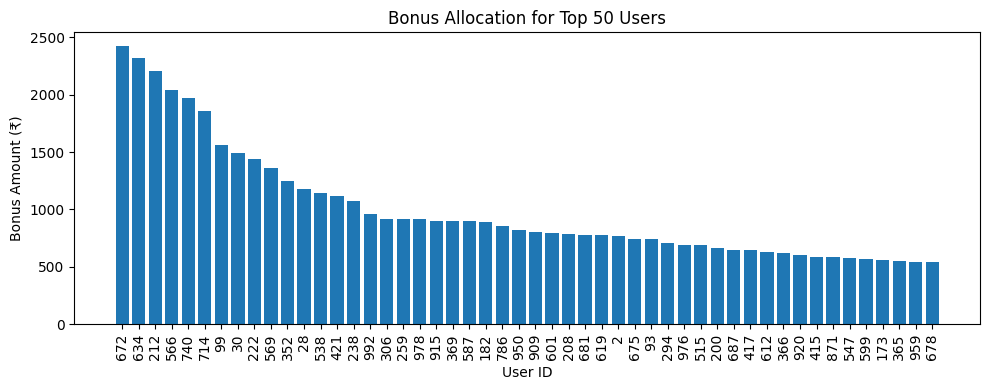

In [27]:
x = t50['user_id'].astype(str)
y = t50['bonus']
    
plt.figure(figsize=(10, 4))
plt.bar(x, y)
plt.title('Bonus Allocation for Top 50 Users')
plt.xlabel('User ID')
plt.ylabel('Bonus Amount (₹)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Part c

Based on the information provided, I can see that the loyalty point formula is a calculation of four different things that is deposit, withdrawal, how many more times deposit was done, than withdrawal and number of games played, each of this has a weight and then the final sum is calculated.

I see that number of games played has the highest weightage followed by deposits, which is a good measure as it rewards both engagement and monetary gain, so this is a good way of calculating loyalty points. I have also seen that there is a weight for withdrawal which is then added in the loyalty points formula, it effectively rewards users for taking money off the platform, which goes against the company’s goal of retaining funds and increasing platform usage. That's why I feel withdrawal should not be added in the loyalty point formula calculation or it should be subtracted from the score.

The second thing I would like to change is the weightage of games played.If the goal is to retain and reward frequent players over high depositors they should increase the weightage for games played as this would make the person playing 50 games equally important as the person who deposits 1000 dollars because based on the given weightage, these two people get the same 10 points(50×0.2 =10 and 1000×0.01 = 10) that's why maybe the weightage could be increased from 0.2 to 0.5 

Lastly, I would recommend including a small reward for consistent logins. Daily activity keeps the platform alive and indirectly leads to more games played and deposits, making these important for the company